In [ ]:
import pandas as pd
%pylab inline
data = pd.read_csv("water.txt",delimiter="\s+")

In [6]:
data.head
print(round(data.corr(), 4))

           mortality  hardness
mortality     1.0000   -0.6548
hardness     -0.6548    1.0000


In [8]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
from scipy.stats import spearmanr
print("Sperman corr: %f %f" % spearmanr(data.mortality, data.hardness))

Sperman corr: -0.631665 0.000000


In [21]:
mean_ = data.mortality.mean()
std_ = data.mortality.std(ddof = 1)/sqrt(len(data.mortality))

In [22]:
print("sgd model mean auc 95%% confidence interval", _tconfint_generic(mean_, std_,
                                                                       len(data.mortality) - 1,
                                                                       0.05, 'two-sided'))


sgd model mean auc 95%% confidence interval (1476.0833413552848, 1572.2117406119285)


In [9]:
N = data[data.location == "North"]
S = data[data.location == "South"]

print(round(S.corr(), 4))
print(round(N.corr(), 4))

           mortality  hardness
mortality     1.0000   -0.6022
hardness     -0.6022    1.0000
           mortality  hardness
mortality     1.0000   -0.3686
hardness     -0.3686    1.0000


In [24]:
S_mean = S.mortality.mean()
S_std = S.mortality.std()/sqrt(len(S.mortality))

N_mean = N.mortality.mean()
N_std = N.mortality.std()/sqrt(len(N.mortality))

print(S_mean, N_mean)

1376.8076923076924 1633.6


In [25]:
print("sgd model mean auc 95%% confidence interval", _tconfint_generic(S_mean, S_std,
                                                                       len(S.mortality) - 1,
                                                                       0.05, 'two-sided'))
print("sgd model mean auc 95%% confidence interval", _tconfint_generic(N_mean, N_std,
                                                                       len(N.mortality) - 1,
                                                                       0.05, 'two-sided'))

sgd model mean auc 95%% confidence interval (1320.1517462936238, 1433.463638321761)
sgd model mean auc 95%% confidence interval (1586.5605251961385, 1680.6394748038613)


In [26]:
S_mean = S.hardness.mean()
S_std = S.hardness.std()/sqrt(len(S.hardness))

N_mean = N.hardness.mean()
N_std = N.hardness.std()/sqrt(len(N.hardness))


In [27]:
print("sgd model mean auc 95%% confidence interval", _tconfint_generic(S_mean, S_std,
                                                                       len(S.hardness) - 1,
                                                                       0.05, 'two-sided'))
print("sgd model mean auc 95%% confidence interval", _tconfint_generic(N_mean, N_std,
                                                                       len(N.hardness) - 1,
                                                                       0.05, 'two-sided'))

sgd model mean auc 95%% confidence interval (53.467198692036106, 86.07126284642544)
sgd model mean auc 95%% confidence interval (21.42248728572426, 39.37751271427574)


In [28]:
(1.960/0.1) ** 2


384.1599999999999

In [29]:
import numpy as np
from statsmodels.stats.proportion import proportion_confint


from statsmodels.stats.proportion import proportion_confint
print(proportion_confint(1, 50, method = 'normal'))

wilson_interval = proportion_confint(1, 50, method = 'wilson')
print(wilson_interval)

(0.0, 0.05880530708179099)
(0.003539259271646236, 0.10495443589637815)


In [30]:
((1.960/0.01) ** 2) * 0.02 *0.98


752.9536

In [31]:
from statsmodels.stats.proportion import samplesize_confint_proportion
from math import ceil
ceil(samplesize_confint_proportion(0.5, 0.01, method='normal'))

9604

In [32]:
print("N(0,1) mean auc 99,7%% confidence interval", _zconfint_generic(0, 1, 0.3 / 100, 'two-sided'))


N(0,1) mean auc 99,7%% confidence interval (-2.9677379253417944, 2.9677379253417944)


In [33]:
round(-104/11037 + 189/11034, 4)

0.0077

In [34]:
asp = np.concatenate((np.ones(104), np.zeros(11037 - 104))) 
placebo = np.concatenate((np.ones(189), np.zeros(11034 - 189))) 

def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

print("confidence interval: [%f, %f]" % proportions_confint_diff_ind(placebo, asp))

NameError: name 'scipy' is not defined

In [ ]:
print(round(104/(11037 - 104), 4))
print(189/(11034 - 189) * (11037 - 104) / 104)
print(0.0095/0.0174)

In [ ]:
np.random.seed(0)
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries
def compute_odds(sample):
    return sum(sample) / (len(sample) - sum(sample)) 

In [ ]:
np.random.seed(0)
scores_asp = list(map(compute_odds, get_bootstrap_samples(asp, 1000)))
scores_placebo = list(map(compute_odds, get_bootstrap_samples(placebo, 1000)))
delta_scores = list(map(lambda x: x[1] / x[0], zip(scores_asp, scores_placebo)))
print(stat_intervals(stat = delta_scores, alpha = 0.05))

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
round(stats.binom_test(67, 100, 0.75), 4)

In [ ]:
round(stats.binom_test(22, 50, 0.75), 9)

In [ ]:
import pandas as pd
%pylab inline
data = pd.read_csv("pines.txt",delimiter="\s+")

In [ ]:
data.head

In [ ]:
from scipy.stats import binned_statistic_2d


In [ ]:
binx = np.linspace(0.0, 200, 6)
biny = binx

In [ ]:
result = binned_statistic_2d(data['sn'].values.astype(float), data['we'].values.astype(float), None, 
                             statistic = 'count', bins = [binx, biny] )

In [ ]:
result.statistic.mean()

In [ ]:
result.statistic

In [ ]:
observed_frequences = np.concatenate((result.statistic[0], 
                                      result.statistic[1], result.statistic[2], result.statistic[3], result.statistic[4]), axis = 0)


In [ ]:
round(stats.chisquare(observed_frequences, ddof = 0)[0], 2)

In [ ]:
stats.chisquare(observed_frequences, ddof = 0)

In [ ]:
%pylab inline
from scipy.stats import norm
z = (9.57 - 9.5)/ (0.4 / sqrt(160) )
print("Z = ", z) 
print(round(2 * (1- norm.cdf(abs(z))),4))

In [ ]:
import pandas as pd
data = pd.read_csv("diamonds.txt",delimiter="\s+")

In [ ]:
data.head()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
y = data['price']
X = data.drop(columns = 'price', inplace =  False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

model1 = LinearRegression()
model2 = RandomForestRegressor(random_state = 1)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
out1 = model1.predict(X_test)
out2 = model2.predict(X_test)
mod1 = abs(y_test - out1)
mod2 = abs(y_test - out2)

In [ ]:
from scipy.stats import probplot, shapiro, ttest_rel 
probplot(out1, dist = "norm", plot = pylab)
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % shapiro(out1))
show()
probplot(out2, dist = "norm", plot = pylab)
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % shapiro(out2))

In [ ]:
from statsmodels.stats.weightstats import *
from sklearn.metrics import mean_absolute_error as mae
print(ttest_rel(mod1, mod2))
a = mae(y_test, out1) 
b = mae(y_test, out2) 
print(a - b)

print("95%% confidence interval: [%f, %f]" %  zconfint(mod1-mod2))

In [ ]:
from scipy.stats import norm
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
    p1 = float(sum(sample1)) / n1
    p2 = float(sum(sample2)) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'less'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

In [ ]:
import numpy as np
import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

test = [1] * 10 + [0] * 24
valid = [1] * 4 + [0] * 12

print("p-value: %f" % round(proportions_diff_z_test(proportions_diff_z_stat_ind(valid, test)), 4))

print("95%% confidence interval for a difference between proportions: [%f, %f]" %\
      proportions_diff_confint_ind(test, valid))

In [ ]:
import pandas as pd
data = pd.read_csv("banknotes.txt",delimiter="\s+")

In [ ]:
data.head()


In [ ]:
data.shape

In [ ]:
from sklearn.model_selection import train_test_split
y = data['real']
X = data.drop(columns = 'real', inplace =  False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

X1_train = X_train[X.columns[:3]]
X2_train = X_train[X.columns[3:]]
X1_test = X_test[X.columns[:3]]
X2_test = X_test[X.columns[3:]]

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model2 = LogisticRegression()

model1.fit(X1_train, y_train)
model2.fit(X2_train, y_train)

In [ ]:
y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)

In [ ]:
from sklearn.metrics import accuracy_score
err1 = 1 - accuracy_score(y_test, y1_pred)
err2 = 1 - accuracy_score(y_test, y2_pred)
print(err1 - err2)

In [ ]:
y__test = y_test.iloc 
def derandomize(x, y_pred):
    for i in range(len(x)):
        if y_pred[i] == int(y__test[i]):
            x[i] = 0
    return x

In [ ]:
def proportions_diff_z_stat_rel(sample1, sample2):
    sample = list(zip(sample1, sample2))
    n = len(sample)
    
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    return float(f - g) / np.sqrt(f + g - float((f - g)**2) / n )

def proportions_diff_confint_rel(sample1, sample2, alpha = 0.05):
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

a1 = np.random.randint(low = 1, high = 2, size = 50)
a2 = np.random.randint(low = 1, high = 2, size = 50)

a1 = derandomize(a1, y1_pred)
a2 = derandomize(a2, y2_pred)

print ("95%% confidence interval for a difference between proportions: [%f, %f]" 
       % proportions_diff_confint_rel(a1, a2))
                                                                                                                
print("p-value: %f" % proportions_diff_z_test(proportions_diff_z_stat_rel(a1, a2)))

In [35]:
%pylab inline
from scipy.stats import norm
std = 100
n = 100 
mean = 525
x_mean = 541.4
z = (x_mean - mean) / (std / sqrt (n))
print( round (1 - norm.cdf(z), 4) )
#x

Populating the interactive namespace from numpy and matplotlib
0.0505


In [41]:
from scipy.stats import wilcoxon
data = np.array([49, 58, 75, 110, 112, 132, 151, 276, 281, 362])
median = 200
stat = wilcoxon(data - median)
print(round(stat[1], 4))

0.2845


In [42]:
from scipy.stats import mannwhitneyu
no = np.array([22, 22, 15, 13, 19, 19, 18, 20, 21, 13, 13, 15])
yes = np.array([17, 18, 18, 15, 12, 4, 14, 15, 10])
stat = mannwhitneyu(no, yes, alternative = 'greater')
print(round(stat[1], 4))

0.029


In [46]:
import pandas as pd
data = pd.read_csv("challenger.txt", delimiter = "\s+")

In [48]:
data.describe()

,Temperature,Incident
count,23.000000,23.000000
mean,20.860870,0.304348
std,3.919501,0.470472
min,11.700000,0.000000
25%,19.400000,0.000000
50%,21.100000,0.000000
75%,23.900000,1.000000
max,27.200000,1.000000


(array([1., 2., 0., 1., 4., 2., 5., 3., 3., 2.]),
 array([11.7 , 13.25, 14.8 , 16.35, 17.9 , 19.45, 21.  , 22.55, 24.1 ,
        25.65, 27.2 ]),
 <a list of 10 Patch objects>)

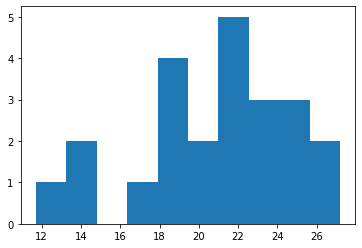

In [52]:
pylab.hist(data.Temperature)

In [75]:
incident = data.Temperature[data.Incident == 1].values
clear = data.Temperature[data.Incident == 0].values


In [76]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [78]:
np.random.seed(0)
incident_scores = list(map(np.mean, get_bootstrap_samples(incident, 1000)))
clear_scores = list(map(np.mean, get_bootstrap_samples(clear, 1000)))
delta_scores = list(map(lambda x: x[0] - x[1], zip(clear_scores, incident_scores)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_scores, 0.05))

95% confidence interval for the difference between medians [1.45040179 8.06457589]


In [79]:

def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), list(filter(lambda i: i not in index, range(n)))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)


In [80]:
np.random.seed(0)
print("p-value: %f" % permutation_test(incident, clear, max_permutations = 10000))

p-value: 0.005700


In [3]:
import pandas as pd
%pylab inline
data = pd.read_csv("illiteracy.txt", delimiter = "\t")

Populating the interactive namespace from numpy and matplotlib


In [4]:
data.head()

,Country,Illit,Births
0,Albania,20.5,1.78
1,Algeria,39.1,2.44
2,Bahrain,15.0,2.34
3,Belize,5.9,2.97
4,Benin,73.5,5.60


In [8]:
print(round(data.corr(), 4))

         Illit  Births
Illit   1.0000  0.7687
Births  0.7687  1.0000


In [9]:
from scipy.stats import spearmanr
print (spearmanr(data.Illit, data.Births))

SpearmanrResult(correlation=0.752962213732534, pvalue=2.0858571221460674e-18)


In [16]:
from sklearn.metrics import matthews_corrcoef
a = 718.0
b = 203.0
c = 515.0
d = 239.0
mcc = (a * d - b * c)/math.sqrt((a + b)*(a + c)*(b + d)*(c + d))
round(mcc, 3)

0.109

In [17]:
from scipy.stats import chi2_contingency
print(chi2_contingency(numpy.array([[a, b], [c, d]])))

(19.40753078854304, 1.0558987006638725e-05, 1, array([[677.96597015, 243.03402985],
       [555.03402985, 198.96597015]]))


In [26]:
from scipy.stats import norm, ttest_ind
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

print(proportions_confint_diff_ind([0] * 515 + [1] * 239, [0] * 718 + [1] * 203))
print(ttest_ind([0] * 515 + [1] * 239, [0] * 718 + [1] * 203))

(0.053905233215813156, 0.13922183141523897)
Ttest_indResult(statistic=4.485175262463444, pvalue=7.78139336142543e-06)


In [28]:
contingencies = np.array([[197, 111, 33], [382, 685, 331], [110, 342, 333]])
chi2_ = chi2_contingency(contingencies)[0]
print(chi2_contingency(contingencies))

(293.68311039689746, 2.4964299580093467e-62, 4, array([[ 93.08597464, 153.74722662,  94.16679873],
       [381.6251981 , 630.318542  , 386.0562599 ],
       [214.28882726, 353.93423138, 216.77694136]]))


In [29]:
n = sum(sum(x) for x in contingencies)
V = sqrt(chi2_ / (n * (min(contingencies.shape[0], contingencies.shape[1] - 1)) ))
round(V, 4)

/home/al_cher/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """Entry point for launching an IPython kernel.


0.2412

In [1]:
import pandas as pd
%pylab inline
data = pd.read_csv("AUCs.txt", delimiter = "\t")

Populating the interactive namespace from numpy and matplotlib


In [2]:
data

,Unnamed: 0,C4.5,C4.5+m,C4.5+cf,C4.5+m+cf
0,adult (sample),0.763,0.768,0.771,0.798
1,breast cancer,0.599,0.591,0.590,0.569
2,breast cancer wisconsin,0.954,0.971,0.968,0.967
3,cmc,0.628,0.661,0.654,0.657
4,ionosphere,0.882,0.888,0.886,0.898
5,iris,0.936,0.931,0.916,0.931
6,liver disorders,0.661,0.668,0.609,0.685
7,lung cancer,0.583,0.583,0.563,0.625
8,lymphography,0.775,0.838,0.866,0.875
9,mushroom,1.000,1.000,1.000,1.000


In [34]:
from scipy.stats import wilcoxon
slice_ = data.iloc[:, 1:]
cols = list(slice_.columns)
result = list()
for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols[i + 1:]):
        w = wilcoxon(slice_[col1], slice_[col2])
        result.append((col1 + " vs " + col2, w[0], w[1]))
        
R = pd.DataFrame.from_records(result, columns = ["Vs", 'Statistics', 'p-Value'])

In [39]:
print(R)
print(R[R['p-Value'] < 0.05])

                     Vs  Statistics   p-Value
0        C4.5 vs C4.5+m         6.5  0.010757
1       C4.5 vs C4.5+cf        43.0  0.861262
2     C4.5 vs C4.5+m+cf        11.0  0.015906
3     C4.5+m vs C4.5+cf        17.0  0.046333
4   C4.5+m vs C4.5+m+cf        22.0  0.327826
5  C4.5+cf vs C4.5+m+cf        10.0  0.022909
                     Vs  Statistics   p-Value
0        C4.5 vs C4.5+m         6.5  0.010757
2     C4.5 vs C4.5+m+cf        11.0  0.015906
3     C4.5+m vs C4.5+cf        17.0  0.046333
5  C4.5+cf vs C4.5+m+cf        10.0  0.022909


In [41]:
from statsmodels.sandbox.stats.multicomp import multipletests
reject, p_corrected, _, _ = multipletests(R['p-Value'], 
                                            alpha = 0.05, 
                                            method = 'holm')
R['p_corrected'] = p_corrected
R['Reject'] = reject
print(R)
print(R[R.p_corrected < 0.05])

                     Vs  Statistics   p-Value  Reject  p_corrected
0        C4.5 vs C4.5+m         6.5  0.010757   False     0.064543
1       C4.5 vs C4.5+cf        43.0  0.861262   False     0.861262
2     C4.5 vs C4.5+m+cf        11.0  0.015906   False     0.079532
3     C4.5+m vs C4.5+cf        17.0  0.046333   False     0.138998
4   C4.5+m vs C4.5+m+cf        22.0  0.327826   False     0.655651
5  C4.5+cf vs C4.5+m+cf        10.0  0.022909   False     0.091636
Empty DataFrame
Columns: [Vs, Statistics, p-Value, Reject, p_corrected]
Index: []


In [42]:
reject, p_corrected, _, _ = multipletests(R['p-Value'], 
                                            alpha = 0.05, 
                                            method = 'fdr_bh')
R['p_corrected'] = p_corrected
R['Reject'] = reject
print(R)
print(R[R.p_corrected < 0.05])

                     Vs  Statistics   p-Value  Reject  p_corrected
0        C4.5 vs C4.5+m         6.5  0.010757    True     0.045818
1       C4.5 vs C4.5+cf        43.0  0.861262   False     0.861262
2     C4.5 vs C4.5+m+cf        11.0  0.015906    True     0.045818
3     C4.5+m vs C4.5+cf        17.0  0.046333   False     0.069499
4   C4.5+m vs C4.5+m+cf        22.0  0.327826   False     0.393391
5  C4.5+cf vs C4.5+m+cf        10.0  0.022909    True     0.045818
                     Vs  Statistics   p-Value  Reject  p_corrected
0        C4.5 vs C4.5+m         6.5  0.010757    True     0.045818
2     C4.5 vs C4.5+m+cf        11.0  0.015906    True     0.045818
5  C4.5+cf vs C4.5+m+cf        10.0  0.022909    True     0.045818


In [1]:
import pandas as pd
%pylab inline
raw = pd.read_csv("botswana.tsv", delimiter = "\t")

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = raw
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


In [3]:
data.describe()


,ceb,age,educ,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
count,4361.000000,4361.000000,4361.000000,4241.000000,4354.000000,4290.000000,4361.000000,2079.000000,1956.000000,4361.000000,4358.000000,4359.000000,4359.000000,4358.000000
mean,2.441642,27.405182,5.855996,4.615892,0.963252,0.577622,0.476726,20.686388,5.144683,0.516625,0.140202,0.701766,0.092911,0.275815
std,2.406861,8.685233,3.927075,2.219303,0.188164,0.493996,0.499515,5.002383,4.803028,0.499781,0.347236,0.457535,0.290341,0.446975
min,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,3.000000,3.000000,1.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,26.000000,7.000000,4.000000,1.000000,1.000000,0.000000,20.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,4.000000,33.000000,8.000000,6.000000,1.000000,1.000000,1.000000,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,1.000000,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
print("religion feature value counts: ", len(set(data.religion.values)))

religion feature value counts:  4


In [5]:
tmp = data.dropna(how = 'any', inplace = False)
tmp.shape

(1834, 15)

In [6]:
data['nevermarr'] = data['agefm'].apply(lambda x : 1 if x != x else 0)
data.drop('evermarr', axis = 1, inplace = True)
data['agefm'].fillna(0, inplace =  True)
data['heduc'].loc[data['nevermarr'] == 1] = -1

/home/al_cher/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
print ("NaNs residual  in heduc feature: ", 
       data[data.heduc.isna()].shape[0])

NaNs residual  in heduc feature:  123


In [8]:
data["idlnchld_noans"] = data['idlnchld'].apply(lambda x : 1 
                                        if x != x else 0)
data["idlnchld"].fillna(-1, inplace =  True)
data["heduc_noans"] = data['heduc'].apply(lambda x : 1 
                                        if x != x else 0)
data["heduc"].fillna(-2, inplace =  True)
data["usemeth_noans"] = data['usemeth'].apply(lambda x : 1 
                                        if x != x else 0)
data["usemeth"].fillna(-1, inplace =  True)

data.dropna(how = 'any', subset = ['knowmeth', 'electric', 'tv', 'radio', 'bicycle'],
           inplace = True)

print('New shape is: (%d, %d)' % data.shape)
print(data.shape[0] * data.shape[1])
data.describe()

New shape is: (4348, 18)
78264


,ceb,age,educ,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
count,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000
mean,2.437443,27.393514,5.863155,4.466191,0.963431,0.553818,9.850736,1.730451,0.517249,0.140064,0.701702,0.092916,0.275299,0.523919,0.027139,0.028059,0.015179
std,2.401785,8.675630,3.922694,2.372879,0.187722,0.526808,10.897246,4.459982,0.499760,0.347094,0.457564,0.290348,0.446716,0.499485,0.162507,0.165160,0.122280
min,0.000000,15.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,3.000000,3.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,26.000000,7.000000,4.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,33.000000,8.000000,6.000000,1.000000,1.000000,19.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,13.000000,49.000000,20.000000,20.000000,1.000000,1.000000,46.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
import statsmodels.formula.api as smf
print(data.columns)
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth +' \
             ' agefm + heduc + urban + electric + radio + tv +'\
             ' bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', data = data)
fitted = m1.fit()
print(fitted.summary())

Index(['ceb', 'age', 'educ', 'religion', 'idlnchld', 'knowmeth', 'usemeth',
       'agefm', 'heduc', 'urban', 'electric', 'radio', 'tv', 'bicycle',
       'nevermarr', 'idlnchld_noans', 'heduc_noans', 'usemeth_noans'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:38:14   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust           

In [10]:
import statsmodels
import scipy as sc
import numpy as np
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

print('Breusch-Pagan test:', 
      sms.het_breuschpagan(fitted.resid, fitted.model.exog))

Breusch-Pagan test: (1120.1205909391385, 1.1452927633437192e-225, 79.04622432815994, 2.0791008841131832e-262)


In [11]:
fitted = m1.fit(cov_type = "HC1")
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     345.0
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:38:14   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:                  HC1                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

In [12]:
m2 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + ' + 
             'usemeth + agefm + heduc + urban + electric + bicycle + '
                + 'nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', data = data)
fitted2 = m2.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:38:15   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

In [13]:
print('Breusch-Pagan test:', 
      sms.het_breuschpagan(fitted2.resid, fitted2.model.exog))

Breusch-Pagan test: (1112.4700385717542, 1.1197458896534061e-228, 106.4151718706295, 3.592611312533355e-265)


In [14]:
fitted2 = m2.fit(cov_type = "HC1")
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:38:15   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [15]:
print("F=%f, p=%f, k1=%f" % m1.fit().compare_f_test(m2.fit()))

F=0.919236, p=0.467231, k1=5.000000


In [16]:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + ' + 
             'agefm + heduc + urban + electric + bicycle + '
                + 'nevermarr + idlnchld_noans + heduc_noans', data = data)
fitted3 = m3.fit(cov_type = "HC2")
print(fitted3.summary())

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.0
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        21:38:18   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC2                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.262     -4.

In [17]:
print(m2.fit().compare_f_test(m3.fit()))

(92.89058230109713, 3.155200948040263e-40, 2.0)
